# Traders@SMU L1 Week 3 Economic Analysis with Python Libraries for Assets Data Presentation Mini Project - Created by Julian Cabrera 

## Your Goal for this Mini Project Assigment is to analyze Economic Events from the Dow Jones Industrial Average(DJIA) and Sectors of the S&P500 ETF.

## You will gather and manupulate Data/Prices using **yfinance, pandas, numpy, & matplotlib.** 

## Then you will make Economic conclusions and insights on the data. 

### **Refer to the Week 3 Asset Class Lecture Notebook as Guide for help & troubelshooting**

## Part 1 : Analyzing the DJIA as an Economic Indicator 

### Step 1 - Import all Necessary Libraries & run cell: yfinance, numpy, pandas, matplotlib.pyplot. **Use alias**

In [3]:
# Import here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Step 2 - Extract DJIA data from your the yfinance libary and set into into a dataframe(df) 

In [9]:
# Complete Step 1 Here

df = yf.download("^DJI", start="2000-01-01", end="2025-03-24", interval="1d")

[*********************100%***********************]  1 of 1 completed


### Step 3 - Now create a dataframe to just show DJIA Closing Prices 


In [19]:
# Only Show Closing Prices 

clipped = df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

### Step 4 - Show the first 5 trading days of the DJIA Dataframe to validate Dataframe

In [21]:
# Use the head method 

print(clipped.head())

Price              Close
Ticker              ^DJI
Date                    
2000-01-03  11357.509766
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570


### Step 5 - Using Matplotlib.pyploy, plot a Line Plot of Historical Closing Prices of the DJIA Dataframe 

#### Include a title, xlabel, & ylabel

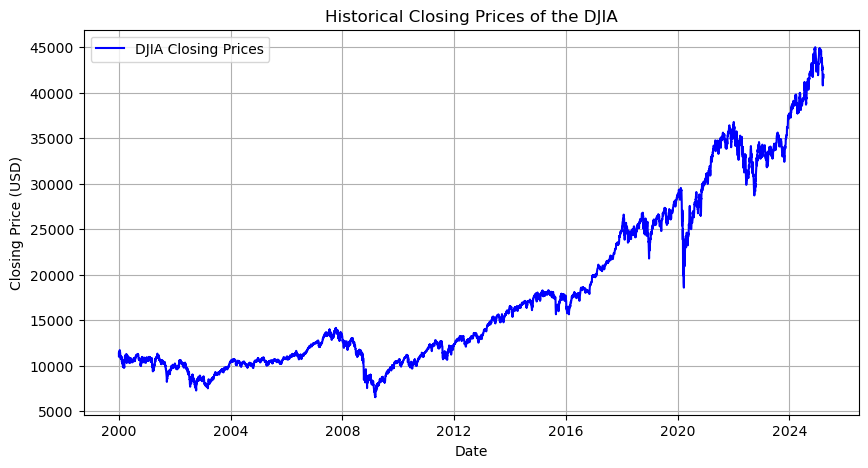

In [23]:
# Plot a Line Plot of Historical Prices of the DJIA Dataframe 

plt.figure(figsize=(10, 5))
plt.plot(clipped.index, clipped['Close'], label='DJIA Closing Prices', color='blue')
plt.title('Historical Closing Prices of the DJIA')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Step 6 - Compute Daily Returns/Changes of DJIA 

#### 1. Use the .values & .flatten() methods to initialize and manipulate numpy array

#### 2. Use the daily returns formula to calculate changes 

#### 3. Print daily returns

In [31]:
# Compute Daily Returns here 


closing_prices = df["Close"].values
closing_prices = closing_prices.flatten()
print(closing_prices)

daily_returns = np.diff(closing_prices) / closing_prices[:-1]
print(daily_returns)

[11357.50976562 10997.9296875  11122.65039062 ... 41964.62890625
 41953.3203125  41985.3515625 ]
[-0.03166012  0.01134038  0.01174265 ...  0.00921857 -0.00026948
  0.0007635 ]


### Step 7 - Create an New Dataframe with Closing Prices, 50 Day rolling Moving Average of Prices , & 200 Day rolling Moving Average of Prices

#### First, multiply the Daily Returns Array by 100 to get in percent form

#### Second, initialize a New Dataframe using the Daily Returns Array & the pdf.DataFrame method 

#### Third, add in columns in the New Dataframe that represent 50 Day rolling Moving Average, & 200 Day rolling Moving Average using the .rolling, .mean() & the .shift(1) methods.

#### &nbsp;&nbsp;&nbsp;&nbsp;      **Hint for Rolling Moving Average Initialization is shown in cell below.**


In [7]:
# df['x Day MA'] = df['Close'].rolling(window= #_days).mean().shift(1)

In [43]:
# Multiply the daily Returns by 100 to get in percent form Now Create 50 Day and 200 Day moving Averages for the DJIA Prices and return 50 Day 200 Day and Daily Returns into a Dataframe
daily_returns_percent=daily_returns*100

daily_returns_df = pd.DataFrame(daily_returns_percent, columns=['Daily Return (%)'], index=df.index[1:])

daily_returns_df['50-Day Average of Daily Returns (%)'] = daily_returns_df['Daily Return (%)'].rolling(50).mean().shift(1)
daily_returns_df['200-Day Average of Daily Returns (%)'] = daily_returns_df['Daily Return (%)'].rolling(200).mean().shift(1)

### Step 8 - Using Matplotlib.pyplot Make a Plot having 50 days MA, 200 MA, and Closing Prices all on the same plot. Make sure each line is a different color to differentiate

#### Include a title, xlabel, ylabel, & legend

#### &nbsp;&nbsp; **Hint: You should use the plt.plot() method twice to graph two seperate Rolling Moving Averages**

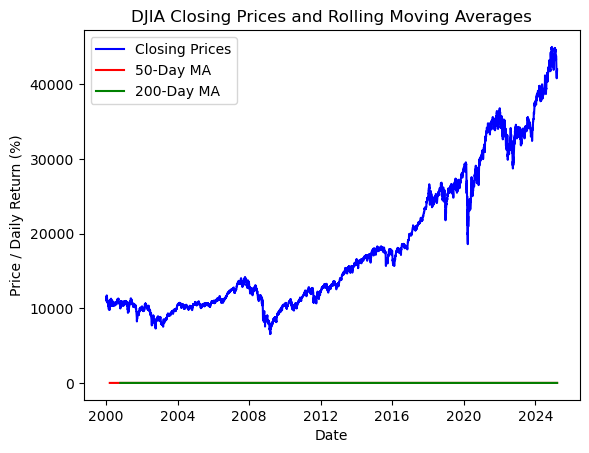

In [45]:
# Plot in this Cell
plt.plot(clipped['Close'], label='Closing Prices', color='blue')

# Plot the 50-Day Moving Average
plt.plot(daily_returns_df['50-Day Average of Daily Returns (%)'], label='50-Day MA', color='red')

# Plot the 200-Day Moving Average
plt.plot(daily_returns_df['200-Day Average of Daily Returns (%)'], label='200-Day MA', color='green')

# Add title, labels, and legend
plt.title('DJIA Closing Prices and Rolling Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price / Daily Return (%)')
plt.legend()

# Display the plot
plt.show()

## Read:

### Golden Cross (Bullish Signal): Occurs when the 50-Day Moving Average(Short-Term) crosses above the the 200 day Moving Average(Long-Term). This is an indicator of a potential long-term uptrend. It often suggests increasing bullish momemntun as short-term buying pressure increases often signaling economic recovery, positive corporate earnings, or supportive monetary policy.

### Death Cross (Bearish Signal): Occurs when the 50-day Moving Average(Short-Term Trend) crosses below the 200-day Moving Average(Long-Term Trend). This is an indicator of a Potential long-term downtrend. It often suggests bearish sentiment, often due to economic slowdowns, recessions, or financial crise signalling panic selling events and market corrections.



### Step 9 - Identify 2 Historic Financial Events that are represented by each a Golden Cross & Death Cross. Go into detail descrbing dates, price levels, and Macroeconomic indicators like umemployment rate, GDP, Inflation, & Interest Rates. Answer  should be at least 5 sentences. 
3
#### Answer Below using # Comments & conduct your own online Research to answer if needed.

In [10]:
# Answer here 
# An example of a golden cross would be the post-2008 financial crisis event. From the graph, we can see a strong downward trend during the crisis
#, but shortly after, a strong uptrend continued until now. To combat the negative effects of the crisis, the Federal
# Government slashed interest rates to almost 0% to stimulate the economy, and inflation was very low to the point of many thinking deflation
# would occur. Furthermore, the unemployment rate shot up to 10%, and real GDP also fell. 
# An example of a death cross is the COVID-19 pandemic in 2020. From the graph, we can see a strong downward trend starting in early 2020.
# Responding to this event, the Federal Reserve lowered interest rates to stimulate the economy, the unemployment rate rose to 14.7%, and real
# GDP fell as well. Inflation also was very low. 



## Part 2 : Analyzing & Comparing the S&P 500 ETF Tech Sector(XLK) vs Finance Sector(XLF)

### Step 1 - Use yfinance to import both datasets & prices for XLK and XLF by creating two different Dataframe(df) for each 

In [57]:
# import data and create dataframes here

df_XLK = yf.download("XLK", start="2001-01-01", end="2025-03-10", interval="1d")
df_XLF = yf.download("XLF", start="2001-01-01", end="2025-03-10", interval="1d")

XLK_clipped = df_XLK.drop(['Open', 'High', 'Low', 'Volume'], axis=1)
XLF_clipped = df_XLF.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Step 2 - Print out the first 5 Trading Days of XLF using the .head() method 

In [59]:
# print here
print(XLK_clipped.head())
print(XLF_clipped.head())


Price           Close
Ticker            XLK
Date                 
2001-01-02  22.077318
2001-01-03  25.632143
2001-01-04  25.889399
2001-01-05  24.322475
2001-01-08  24.252316
Price           Close
Ticker            XLF
Date                 
2001-01-02  14.312638
2001-01-03  15.084818
2001-01-04  14.819620
2001-01-05  14.507632
2001-01-08  14.359428


### Step 3 - Print out the first 5 Trading Days of XLF using the .head() method 

In [61]:
# print here

print(XLK_clipped.head())
print(XLF_clipped.head())



Price           Close
Ticker            XLK
Date                 
2001-01-02  22.077318
2001-01-03  25.632143
2001-01-04  25.889399
2001-01-05  24.322475
2001-01-08  24.252316
Price           Close
Ticker            XLF
Date                 
2001-01-02  14.312638
2001-01-03  15.084818
2001-01-04  14.819620
2001-01-05  14.507632
2001-01-08  14.359428


### Step 4 - Using Matplotlib.pyplt, plot the Closing Prices of each XLK and XLF on a the same Line Plot for Further Analysis

#### Include a title, xlabel, ylabel, legend, & grid

MultiIndex([('Close', 'XLK')],
           names=['Price', 'Ticker'])
MultiIndex([('Close', 'XLF')],
           names=['Price', 'Ticker'])


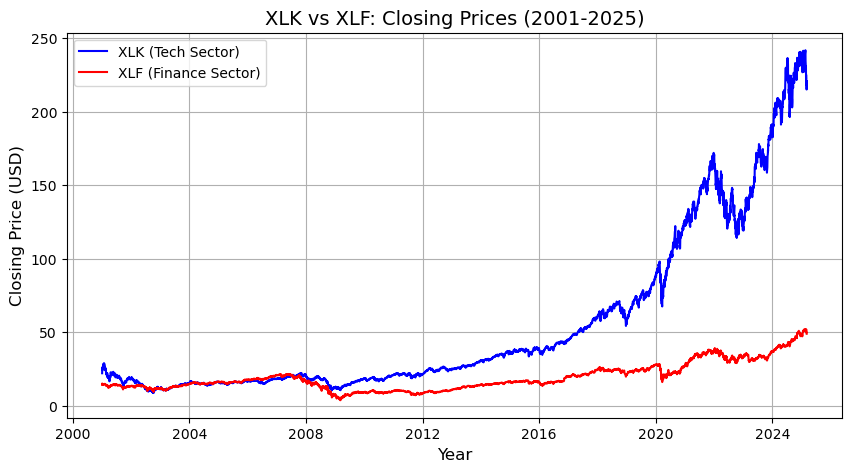

In [65]:
# Insert Plot Here 

print(XLK_clipped.columns)
print(XLF_clipped.columns)

plt.figure(figsize=(10, 5))  

plt.plot(XLK_clipped.index, XLK_clipped['Close'], label="XLK (Tech Sector)", color='blue') 
plt.plot(XLF_clipped.index, XLF_clipped['Close'], label="XLF (Finance Sector)", color='red')  

plt.title("XLK vs XLF: Closing Prices (2001-2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend() 
plt.grid(True)  

plt.show()


### Step 5 - How did both Sectors perform during the Dot-com bubble (1999-2002)? What do you think caused both Sector's Price Behavior? Be Specifc with Dates, Company Names, and write at least 3 sentences 

#### Answer below in # Comments & conduct your own online Research to answer if needed.


In [15]:
# Answer here 
#The tech sector decreased while the finance sector stayed relatively the same. Companies such as Pets.com and Boo.com 
# failed to perform. They could not survive the dot com bubble—companies and individuals highly invested in these companies, 
# resulting in the organizations going bankrupt. As startups collapsed, companies centered around investment banking tanked such as 
# JP Morgan. 


### Step 6 - What specific trends have caused the increasing Divergence in XLF and XLK? Be specific and write at least 3 sentences 

#### Answer below in # Comments & conduct your own online Research to answer if needed.

In [16]:
# Answer here 

